<div class="usecase-title">Leveraging Property Ownership Data for Smart Urban Planning and Development</div>

<div class="usecase-authors"><b>Authored by: Mahesh chirra</b> </div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<header>
<h2>Introduction</h2>
<div>The City of Melbourne’s Urban Planning Department is facing rapid population growth and increased pressure on infrastructure. To manage this growth sustainably, the city initiates a data-driven project using property ownership records, residential dwelling data, and business establishment datasets.</div>
<header>
<h2>Scenario</h2>       
<div>I want to analyze land ownership, residential density, and business activity across Melbourne,so that I can uncover patterns in land use and identify opportunities for balanced urban growth.
Property ownership data provides crucial insights into how land is currently utilized and where it may be underutilized. This analysis helps detect high-density zones that need infrastructure upgrades and low-activity areas suitable for redevelopment. The outcome will support strategic planning that aligns with sustainable development goals and improves overall city livability.I want to evaluate land utilization trends using integrated datasets,so that I can guide zoning policy and investment strategies for future growth.
By combining property boundaries with residential and commercial data, this analysis helps pinpoint areas with high development potential or imbalanced land use. It enables evidence-based decisions that promote efficient land distribution, inform real estate investments, and foster community well-being through more equitable urban development.</div>
<header>   
<h2>DATASETS :</h2>
<div>DATASET 1:https://data.melbourne.vic.gov.au/explore/dataset/property-boundaries/information/</div>
    <div>TITLE:Property Boundaries Dataset</div>
<div>The Property Boundaries Dataset defines land ownership, parcel boundaries, and zoning regulations across Melbourne. This comprehensive spatial information helps planners optimize land use, infrastructure development, and identify redevelopment opportunities in various neighborhoods.</div>
    
<div>DATASET 2:https://data.melbourne.vic.gov.au/explore/dataset/residential-dwellings/information/</div>
    <div>TITLE:Residential Dwellings Datase</div>
<div>The Residential Dwellings Dataset contains detailed information on housing density, dwelling types, and spatial distribution throughout Melbourne's metropolitan area. This valuable resource guides urban expansion initiatives, infrastructure planning decisions, and the development of affordable housing policies that address community needs.</div>
    
<div>DATASET 3:https://data.melbourne.vic.gov.au/explore/dataset/business-establishments-with-address-and-industry-classification/information/</div>
    <div>TITLE:Business Establishments Dataset</div>
<div>The Business Establishments Dataset maps commercial properties, industry classifications, and business locations across Melbourne's diverse neighborhoods. This rich dataset supports economic development planning, informs zoning regulation decisions, and highlights potential investment opportunities for developers and entrepreneurs.</div>


# importing required libraries

In [9]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd

# datsets through api

In [2]:
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id  = dataset_id
    format='csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit' : -1,
        'lang' : 'en',
        'timezone' : 'UTC'
    }

    response = requests.get(url,params=params)

    if response.status_code ==200:
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f"Request failed with status code: {response.status_code}")
# population_smallarea dataset
dataset_id_1 = 'property-boundaries'
dataset_id_2 = 'residential-dwellings'
dataset_id_3 = 'business-establishments-with-address-and-industry-classification'

property_boundaries= collect_data(dataset_id_1)
residential_dwellings = collect_data(dataset_id_2)
business_establishments = collect_data(dataset_id_3)

print(len(property_boundaries))
print(len(residential_dwellings))
print(len(business_establishments))

15171
209162
393878


# DATA CLEANING
*DATASET 1:In the Property Boundaries dataset, the initial data cleaning involved standardizing column names by removing unnecessary whitespace and converting them to lowercase to ensure consistency during analysis. The geo_point_2d field, which contained location coordinates as a single string, was split into separate latitude and longitude columns to facilitate spatial analysis and mapping.

In [15]:
property_boundaries.head()

,json_geometry,polyarea,address,gis_id,property_id,property_name,date_updated,polygon,geo_point_2d
0,"{""coordinates"": [[[144.9360734981, -37.7937398...",3,Western Link Lease Western Link Road WEST MELB...,13678,600432,Western Link Lease,20250328,POLYGON ((144.93607349806643 -37.7937398486385...,"-37.79374885598507, 144.93607324739605"
1,"{""coordinates"": [[[144.9505545804, -37.8142700...",5136,263-283 Spencer Street DOCKLANDS VIC 3008,13684,644320,Victoria Police Centre,20250328,POLYGON ((144.95055458035367 -37.8142700690472...,"-37.814334023977956, 144.95122185789083"
2,"{""coordinates"": [[[144.9622540987, -37.8059113...",1748,28-44 Bouverie Street CARLTON VIC 3053,13686,661088,NaN,20250328,POLYGON ((144.9622540986873 -37.80591139065004...,"-37.805685875048724, 144.96194796910737"
3,"{""coordinates"": [[[144.9567155773, -37.8110338...",1204,354-360 William Street MELBOURNE VIC 3000,13689,631819,NaN,20250328,POLYGON ((144.95671557731012 -37.8110338508576...,"-37.81095461839001, 144.95645361367872"
4,"{""coordinates"": [[[144.9435266604, -37.8243083...",601,101 River Esplanade DOCKLANDS VIC 3008,13691,645314,NaN,20250328,POLYGON ((144.94352666036724 -37.8243083614612...,"-37.8239671526651, 144.94327382570947"


In [16]:
property_boundaries.columns = property_boundaries.columns.str.strip().str.lower()


In [17]:
property_boundaries[['Latitude', 'Longitude']] = property_boundaries['geo_point_2d'].str.split(',', expand=True).astype(float)

In [18]:
property_boundaries.isnull().sum()

json_geometry        0
polyarea             0
address              0
gis_id               0
property_id          0
property_name    11778
date_updated         0
polygon              0
geo_point_2d         0
Latitude             0
Longitude            0
dtype: int64

In [20]:
property_boundaries['property_name'] = property_boundaries['property_name'].fillna('Unknown')

In [21]:
property_boundaries.isnull().sum()

json_geometry    0
polyarea         0
address          0
gis_id           0
property_id      0
property_name    0
date_updated     0
polygon          0
geo_point_2d     0
Latitude         0
Longitude        0
dtype: int64

In [23]:
print(len(property_boundaries))

15171


*DATASET 2:In the Residential Dwellings dataset, the data cleaning process involved standardizing column names for consistency and identifying missing values, particularly in the latitude and longitude fields. Rows with missing geographic coordinates were removed to ensure accuracy in location-based analysis.

In [24]:
residential_dwellings.head()

,census_year,block_id,property_id,base_property_id,building_address,clue_small_area,dwelling_type,dwelling_number,longitude,latitude,location
0,2002,13,103954,103954,381-387 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Residential Apartments,2,144.961399,-37.818252,"-37.81825225091258, 144.96139854749805"
1,2002,13,106435,106435,21-31 Market Street MELBOURNE 3000,Melbourne (CBD),Residential Apartments,111,144.960430,-37.818647,"-37.818646932212395, 144.96042989133713"
2,2002,14,103165,103165,1-5 Elizabeth Street MELBOURNE 3000,Melbourne (CBD),Residential Apartments,2,144.964617,-37.818058,"-37.81805796983434, 144.96461741084877"
3,2002,14,103911,103911,5-7 Flinders Court MELBOURNE 3000,Melbourne (CBD),House/Townhouse,1,144.964163,-37.817759,"-37.817759429593565, 144.96416338914727"
4,2002,14,103949,103949,333 Flinders Lane MELBOURNE 3000,Melbourne (CBD),Residential Apartments,2,144.963345,-37.817821,"-37.81782053323523, 144.96334455749917"


In [25]:
residential_dwellings.isnull().sum()

census_year            0
block_id               0
property_id            0
base_property_id       0
building_address       0
clue_small_area        0
dwelling_type          0
dwelling_number        0
longitude           2869
latitude            2869
location            2869
dtype: int64

In [26]:
residential_dwellings = residential_dwellings.dropna(subset=['latitude', 'longitude'])

In [27]:
residential_dwellings['dwelling_type'] = residential_dwellings['dwelling_type'].astype('category')

In [28]:
residential_dwellings.isnull().sum()

census_year         0
block_id            0
property_id         0
base_property_id    0
building_address    0
clue_small_area     0
dwelling_type       0
dwelling_number     0
longitude           0
latitude            0
location            0
dtype: int64

*DATASET 3:In the Business Establishments dataset, cleaning involved standardizing column names and addressing missing values in key fields. Records with missing latitude and longitude were removed to maintain accuracy in geospatial analysis. Additionally, missing trading name values were filled with "Unknown" to preserve those entries for land use classification. These steps ensured the dataset was complete, consistent, and ready for integration with property and residential data.

In [29]:
business_establishments.head()

,census_year,block_id,property_id,base_property_id,clue_small_area,trading_name,business_address,industry_anzsic4_code,industry_anzsic4_description,longitude,latitude,point
0,2008,1007,557160,557160,West Melbourne (Industrial),Australian Bulk Alliance,18 Enterprize Road WEST MELBOURNE 3003,5309,Other Warehousing and Storage Services,144.928829,-37.813597,"-37.8135968481, 144.92882938462844"
1,2008,1007,612871,612871,West Melbourne (Industrial),Port of Melbourne Corporation,Adjacent 499-623 Footscray Road WEST MELBOURNE...,5212,Port and Water Transport Terminal Operations,144.920609,-37.808462,"-37.808461523999995, 144.92060866455546"
2,2008,1007,612881,612881,West Melbourne (Industrial),Port of Melbourne Corporation,74 Appleton Dock Road WEST MELBOURNE 3003,5212,Port and Water Transport Terminal Operations,144.925173,-37.814461,"-37.814461481799995, 144.92517284472797"
3,2008,1007,612882,612882,West Melbourne (Industrial),Vacant,20 Enterprize Road WEST MELBOURNE 3003,0,Vacant Space,144.930528,-37.813192,"-37.81319232635, 144.9305284261212"
4,2008,1009,102954,102954,West Melbourne (Industrial),Victorian Rail Track Corporation,"Rear Level 3, 338-360 Dudley Street WEST MELBO...",4720,Rail Passenger Transport,144.943517,-37.811704,"-37.81170358641947, 144.94351739145"


In [30]:
business_establishments.isnull().sum()

census_year                        0
block_id                           0
property_id                        0
base_property_id                   0
clue_small_area                    0
trading_name                     127
business_address                   1
industry_anzsic4_code              0
industry_anzsic4_description       0
longitude                       4785
latitude                        4785
point                           4785
dtype: int64

In [31]:
business_establishments = business_establishments.dropna(subset=['latitude', 'longitude'])

In [32]:
business_establishments['trading_name'] = business_establishments['trading_name'].fillna('Unknown')

In [33]:
business_establishments = business_establishments.dropna(subset=['business_address'])

In [34]:
business_establishments.isnull().sum()


census_year                     0
block_id                        0
property_id                     0
base_property_id                0
clue_small_area                 0
trading_name                    0
business_address                0
industry_anzsic4_code           0
industry_anzsic4_description    0
longitude                       0
latitude                        0
point                           0
dtype: int64

Distinguishing between residential, commercial, and mixed-use properties is a critical step in this use case, as it allows urban planners, developers, and policymakers to understand how land is currently utilized across Melbourne. By classifying properties based on their usage, we can identify areas that are densely populated, commercially active, or serve dual purposes—insights that are essential for informed decision-making. This classification helps highlight imbalances or opportunities in land use, supports zoning decisions, and guides investment strategies aimed at promoting sustainable urban growth, enhancing infrastructure planning, and improving community well-being.

In [35]:
residential_ids = set(residential_dwellings['property_id'].unique())
business_ids = set(business_establishments['property_id'].unique())

In [36]:
def classify_land_use(property_id):
    in_residential = property_id in residential_ids
    in_business = property_id in business_ids
    if in_residential and in_business:
        return "Mixed-Use"
    elif in_residential:
        return "Residential"
    elif in_business:
        return "Commercial"
    else:
        return "Unclassified"

In [37]:
property_boundaries['land_use_type'] = property_boundaries['property_id'].apply(classify_land_use)

In [38]:
property_boundaries.head()

,json_geometry,polyarea,address,gis_id,property_id,property_name,date_updated,polygon,geo_point_2d,Latitude,Longitude,land_use_type
0,"{""coordinates"": [[[144.9360734981, -37.7937398...",3,Western Link Lease Western Link Road WEST MELB...,13678,600432,Western Link Lease,20250328,POLYGON ((144.93607349806643 -37.7937398486385...,"-37.79374885598507, 144.93607324739605",-37.793749,144.936073,Unclassified
1,"{""coordinates"": [[[144.9505545804, -37.8142700...",5136,263-283 Spencer Street DOCKLANDS VIC 3008,13684,644320,Victoria Police Centre,20250328,POLYGON ((144.95055458035367 -37.8142700690472...,"-37.814334023977956, 144.95122185789083",-37.814334,144.951222,Commercial
2,"{""coordinates"": [[[144.9622540987, -37.8059113...",1748,28-44 Bouverie Street CARLTON VIC 3053,13686,661088,Unknown,20250328,POLYGON ((144.9622540986873 -37.80591139065004...,"-37.805685875048724, 144.96194796910737",-37.805686,144.961948,Mixed-Use
3,"{""coordinates"": [[[144.9567155773, -37.8110338...",1204,354-360 William Street MELBOURNE VIC 3000,13689,631819,Unknown,20250328,POLYGON ((144.95671557731012 -37.8110338508576...,"-37.81095461839001, 144.95645361367872",-37.810955,144.956454,Commercial
4,"{""coordinates"": [[[144.9435266604, -37.8243083...",601,101 River Esplanade DOCKLANDS VIC 3008,13691,645314,Unknown,20250328,POLYGON ((144.94352666036724 -37.8243083614612...,"-37.8239671526651, 144.94327382570947",-37.823967,144.943274,Unclassified


In [39]:
land_use_summary = property_boundaries['land_use_type'].value_counts().reset_index()
land_use_summary.columns = ['land_use_type', 'count']

In [40]:
print(land_use_summary)

  land_use_type  count
0   Residential   8870
1    Commercial   3914
2     Mixed-Use   1966
3  Unclassified    421


# VISUALIZATION

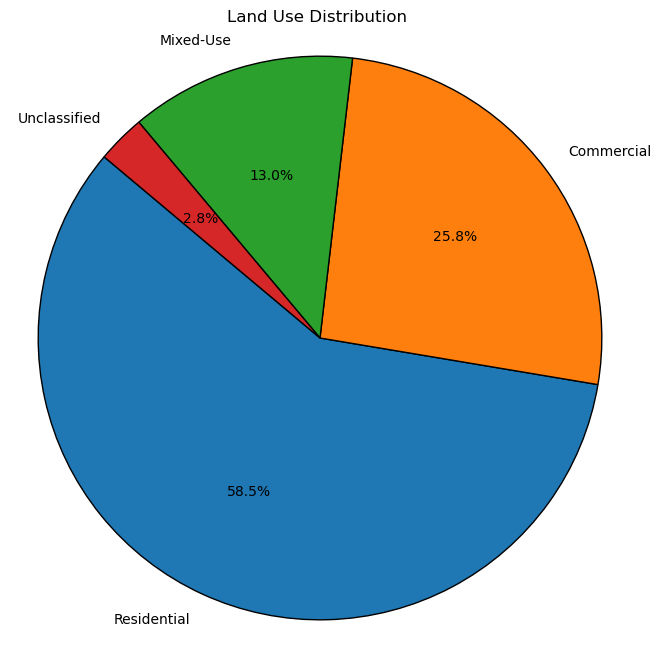

In [41]:
plt.figure(figsize=(8, 8))
plt.pie(
    land_use_summary['count'],
    labels=land_use_summary['land_use_type'],
    autopct='%1.1f%%',       # Show percentages
    startangle=140,         
    wedgeprops={'edgecolor': 'black'} 
)

plt.title("Land Use Distribution ")
plt.axis('equal') 
plt.show()

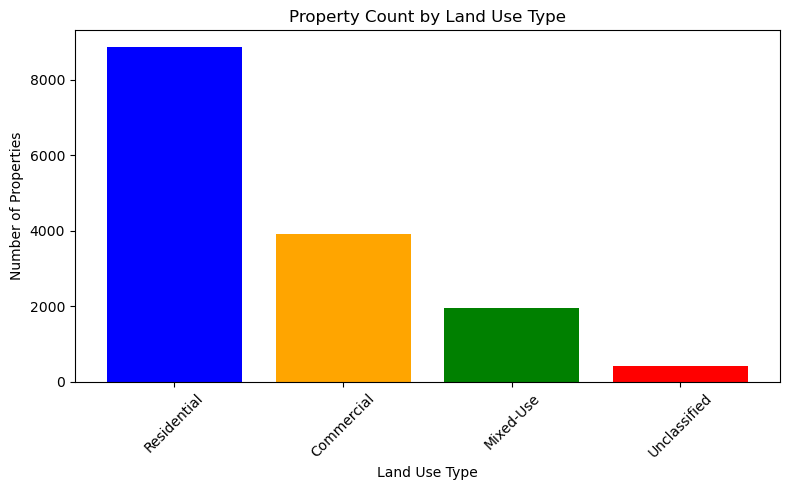

In [42]:
colors = ['blue', 'orange', 'green', 'red']  
plt.figure(figsize=(8, 5))
plt.bar(land_use_summary['land_use_type'], land_use_summary['count'], color=colors)
plt.title("Property Count by Land Use Type")
plt.xlabel("Land Use Type")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This classification was essential to identify land use patterns throughout Melbourne, aligning directly with my use case of supporting urban planning and zoning decisions. I then summarized and visualized this classification using both a pie chart, which shows the percentage distribution of land use types, and a bar chart, which presents the actual count of properties in each category. These visual insights provide a clear understanding of how land is currently utilized, helping stakeholders make informed decisions about infrastructure, investment, and sustainable urban growth